#### 1.导入需要的库

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### 2.导入数据集，探索数据

In [16]:
data = pd.read_csv('data.csv',index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### 3.对数据集进行预处理

In [18]:
# 删除缺失值过多的列，和判断来说和预测的y没有关系的列
data.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)

In [19]:
# 处理缺失值，对缺失值较多的列进行填补，有一些特征只缺一两个值，可以采取直接删除记录的方法
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.dropna()

In [20]:
# 将分类变量转化为数值变量
# 将二分类变量转化为数值型变量
# 通过布尔值和astype将二分类变量转化为数值变量
data['Sex'] = (data['Sex']=='male').astype(int)

In [21]:
# 将三分类变量转化为数值变量
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))

In [22]:
data.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
97,0,1,1,71.0,0,0,34.6542,1
98,1,1,1,23.0,0,1,63.3583,1
99,1,2,0,34.0,0,1,23.0000,0


#### 4.提取标签和特征矩阵，分测试集和训练集

In [23]:
X = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

# 修正测试集和训练集的索引
for i in [Xtrain,Xtest,ytrain,ytest]:
    i.index = range(i.shape[0])

In [24]:
# 查看分好的训练集和测试集
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,20.000000,1,0,9.8250,0
1,3,1,20.000000,1,0,7.9250,0
2,1,1,40.000000,0,0,27.7208,1
3,3,1,29.699118,0,0,7.8958,0
4,1,0,30.000000,0,0,56.9292,1


#### 5.导入模型，粗略跑一下结果

In [25]:
clf = tree.DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest)
score

0.7415730337078652

In [26]:
score = cross_val_score(clf,X,y,cv=10).mean()
score

0.7739274770173645

#### 6.在不同的max_depth下观察模型的拟合情况

0.8127340823970037


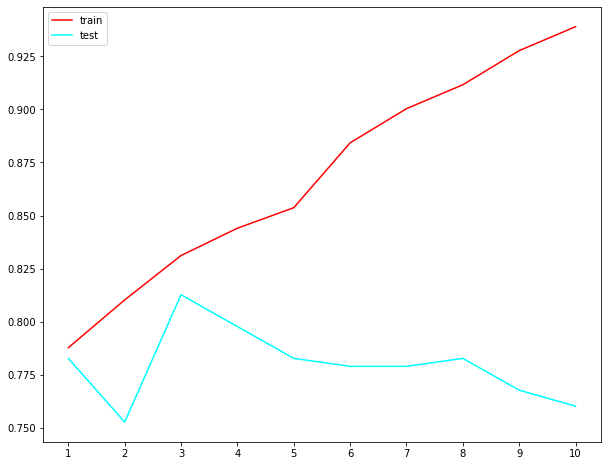

In [27]:
tr = []
te = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(random_state=25
                                     ,max_depth=i+1
                                     ,criterion='entropy'
                                     )
    clf = clf.fit(Xtrain,ytrain)
    score_tr = clf.score(Xtrain,ytrain)
    score_te = clf.score(Xtest,ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.figure(figsize=(10,8))
plt.plot(range(1,11),tr,label='train',color='red')
plt.plot(range(1,11),te,label='test',color='cyan')
plt.xticks(range(1,11))
plt.legend()
plt.show()

#### 7.利用网格搜索调整参数

In [28]:
parameters = {'splitter':['best','random']
             ,'criterion':['gini','entropy']
             ,'max_depth':[*range(1,10)]
             ,'min_samples_leaf':[*range(1,50,5)]
             ,'min_impurity_decrease':[*np.linspace(0,5,20)]
             }

clf = tree.DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.2631578947368421,
                                                   0.5263157894736842,
                                                   0.7894736842105263,
                                                   1.0526315789473684,
                                                   1.3157894736842104,
                                                   1.5789473684210527,
                                                   1.8421052631578947,
                                                   2.1052631578947367,
                                                   2.3684210526315788,
                                                   2.631578947368421,
                                                   2.894736842105263,
                   

In [29]:
GS.best_params_  # 返回最佳组合

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [30]:
GS.best_score_  # 返回最高分数

0.8215309779825908